In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [2]:
df = pd.read_csv("scores_data.csv")
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
df.shape

(149, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [5]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


In [6]:
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [7]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df = df.drop_duplicates()

In [10]:
df["Score"].head(10)

,Score
0,6 / 7
1,6 / 7
2,7 / 7
3,7 / 7
4,4 / 7
5,7 / 7
6,5 / 7
7,7 / 7
8,3 / 7
9,6 / 7


In [11]:
df["Score"] = (
    df["Score"]
    .astype(str)
    .str.extract(r'([0-7])')
)

In [12]:
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")

In [13]:
df["Score"].isnull().sum()

np.int64(0)

In [14]:
df = df.dropna(subset=["Score"])

In [15]:
df.dtypes

,0
Batch,object
User_ID,object
Score,int64


In [16]:
df["Batch"].value_counts()

,count
Batch,
AI_ELITE_7,53
AI_ELITE_6,48
AI_ELITE_4,48


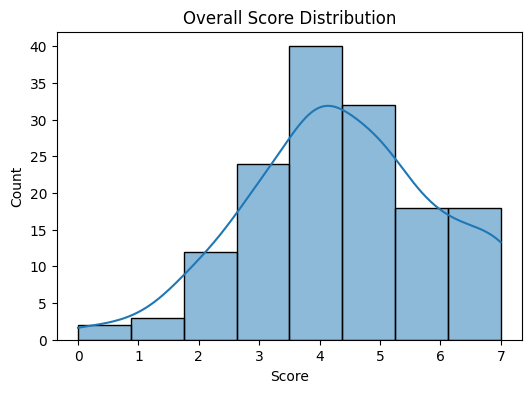

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(df["Score"], bins=8, kde=True)
plt.title("Overall Score Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [18]:
batch_stats = df.groupby("Batch")["Score"].agg(
    count="count",
    mean="mean",
    median="median",
    min="min",
    max="max",
    std="std"
)

batch_stats

,count,mean,median,min,max,std
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,0,7,1.443376
AI_ELITE_6,48,4.229167,4.0,0,7,1.640441
AI_ELITE_7,53,5.056604,5.0,2,7,1.446682


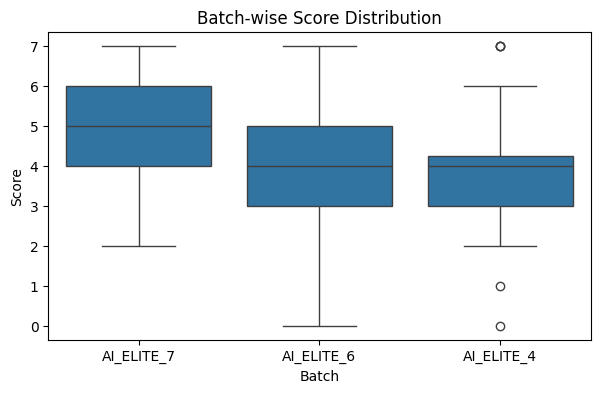

In [19]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Batch", y="Score", data=df)
plt.title("Batch-wise Score Distribution")
plt.show()

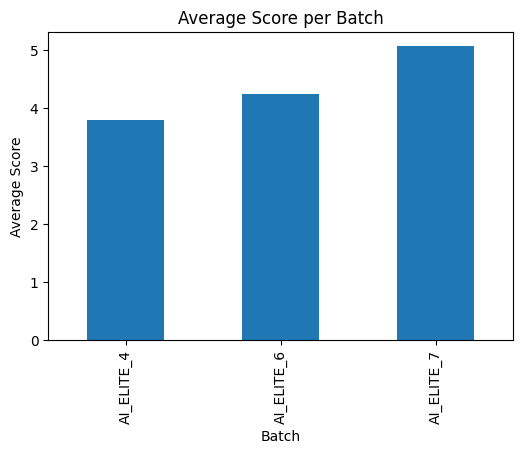

In [20]:
batch_stats["mean"].plot(kind="bar", figsize=(6,4))
plt.title("Average Score per Batch")
plt.ylabel("Average Score")
plt.show()

In [21]:
df[df["Score"] >= 5].groupby("Batch")["User_ID"].count()

,User_ID
Batch,
AI_ELITE_4,12
AI_ELITE_6,22
AI_ELITE_7,34


In [22]:
df[df["Score"] <= 2].groupby("Batch")["User_ID"].count()

,User_ID
Batch,
AI_ELITE_4,9
AI_ELITE_6,6
AI_ELITE_7,2


🔍 Insights & Observations

AI_ELITE_7 is the best-performing batch, with the highest average score (~5.06) and the highest number of high scorers (34 students scoring ≥5).

AI_ELITE_6 shows moderate performance, with an average score (~4.23) and a balanced distribution of scores.

AI_ELITE_4 has the lowest average score (~3.79) and the highest number of low scorers (9 students scoring ≤2), indicating weaker overall performance.

Score distribution across batches is approximately normal, but AI_ELITE_4 shows more low-end scores, while AI_ELITE_7 is skewed towards higher scores.

AI_ELITE_4 is relatively consistent (lower spread) but consistently at a lower performance level.

✅ Conclusion

The analysis clearly shows performance variation across batches.
AI_ELITE_7 demonstrates strong overall performance and can be considered a benchmark batch.
AI_ELITE_4 requires focused academic intervention to improve outcomes, while AI_ELITE_6 lies in between and may benefit from targeted support.
Adopting effective learning strategies from AI_ELITE_7 could help improve performance across all batches.